1) Logistic Regression
+ classification of algorithm used for binary and multi-class classification problems. It predicts the probability that a given inout belongs to a paticular class.

2) Mathematical Formulation:
+ Sigmoid Function

3) Logistic Regression in Scikit-Learn

In [1]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#generate synthetic dataset
from sklearn.datasets import make_classification

#make_classification generates a synthetic dataset with given parameters 
#n_samples: number of data points
#n_features: number of input features
#random_states: Ensures reproducibility 

data, labels = make_classification(n_samples=1000, n_features=5, random_state=42)


In [3]:
#convert the DataFrame for better visualization
df = pd.DataFrame(data, columns=[f'Feature_{i}' for i in range(1, 6)])
df['Label'] = labels

In [4]:
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Label
0,-0.439643,0.542547,-0.822420,0.401366,-0.854840,0
1,2.822231,-2.480859,-1.147691,-2.101131,3.040278,1
2,1.618386,-1.369478,-2.084113,-1.179659,1.613602,1
3,1.659048,-0.615202,1.112688,-0.835098,-0.272205,1
4,1.849824,-1.679456,-0.926698,-1.402509,2.123129,1


In [5]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [6]:
#standerdizing the dataset

'''Standardization is essential for logistic regression because it ensures that all the features contribute equally to the model. 
Since features may have different scales, standardization transform themt to have a mean of 0 and a standard deviation of 1.
This helps in faster convergence and prevents dominance of features with larger scales over smaller ones.'''

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Creating and training Logistic regression model 
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
#prediction
y_pred = model.predict(X_test)

In [9]:
#evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
conf_mat= confusion_matrix(y_test, y_pred)

print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.885
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        97
           1       0.93      0.84      0.88       103

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200



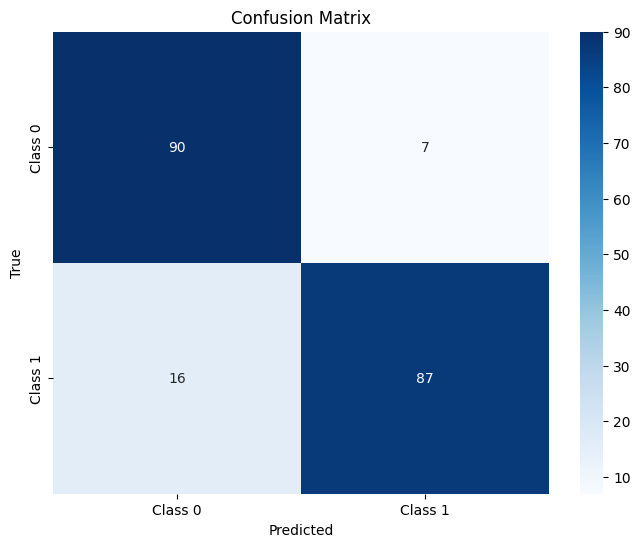

In [10]:
#heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

4. Understanding the formula used by Scikit-Learn

5. Hyperparameters of Logistic Regression
+ penalty: Type of regularization
+ C: Inverse of regularization strength
+ solver: Optimization algorithm ("lbfgs", "liblinear","saga",etc.)
+ max_iter: Maximum number of iterations for convergence

6. Advanced Logistic Regression: Regularization and Feature Importance

In [11]:
#regularized logistic regression   
model_reg = LogisticRegression(penalty='l2', C=0.4, solver='saga')
model_reg.fit(X_train, y_train)
print("Accuracy with regularization:", accuracy_score(y_test, model_reg.predict(X_test)))

Accuracy with regularization: 0.885


7. Prediction on data

In [12]:
#making prediction on test dataset
test_predictions= model.predict(X_test)
print("Predictions on test data:", test_predictions[:10])  # Displaying first 10 predictions

Predictions on test data: [1 0 1 1 0 0 1 0 0 1]


8. Inference for example features

In [13]:
#example feature input for prediction
example_features = np.array([[0.5, -1.2, 0.3, 0.8, -0.5]])

example_features_scaled = scaler.transform(example_features)

In [14]:
#making predictions
inference_prediction = model.predict(example_features_scaled)
print("Inference prediction:", inference_prediction)

Inference prediction: [1]


Class: 2 

9. Classification using real Dataset

+ 

In [15]:
data= pd.read_csv('diabetes.csv')

In [16]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
#Creating and training Logistic regression model 
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Precision = (TP) / (TP+FP)   
Recall = (TP) / (TP+FN)

In [20]:
#prediction and evaulation
y_pred = model.predict(X_test)
print("Diabetes dataset Accuracy:", accuracy_score(y_test, y_pred))
print("Consufion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Diabetes dataset Accuracy: 0.7532467532467533
Consufion matrix:
 [[79 20]
 [18 37]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [21]:
import joblib

joblib.dump(model, 'logistic_regression_model.joblib')
joblib.dump(scaler, 'diabetes_scaler.joblib')

['diabetes_scaler.joblib']

In [22]:
label_map = {0: 'No DIABETES', 1:'DIABETES'}

In [23]:
#loaded model from joblib and predict using any sample
loaded_model = joblib.load('logistic_regression_model.joblib')
loaded_scaler = joblib.load('diabetes_scaler.joblib')


In [24]:
# patient_sample = np.array([[65,5,28.39,130.1,77.0,]])
data_path_sample = np.array([[1,85,66,29,0,26.6,0.351,31]])

In [25]:
predcition = loaded_model.predict(loaded_scaler.transform(data_path_sample))

c:\Users\RICKY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
predcition[0]

0

In [27]:
predicted = label_map[predcition[0]]
print(f"Predicted label: {predicted}")

Predicted label: No DIABETES
